In [2]:
# imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

warnings.filterwarnings("ignore")

In [3]:
# reading the files - train and test, then merge
trainingSet = pd.read_csv("./data/train.csv")
submissionSet = pd.read_csv("./data/test.csv")
Xtrain = pd.read_csv("./data/X_train.csv")
Xtest = pd.read_csv("./data/X_test.csv")


Xtrain.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,ReviewLength,SummaryLength
0,0,0005019281,ADZPIG9QOCDG5,0,0,4.0,1203984000,good version of a classic,This is a charming version of the classic Dick...,0.0,54.0,5.0
1,1,0005019281,A35947ZP82G7JH,0,0,3.0,1388361600,Good but not as moving,It was good but not as emotionally moving as t...,0.0,23.0,5.0
2,2,0005019281,A3UORV8A9D5L2E,0,0,3.0,1388361600,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha...",0.0,47.0,6.0
3,3,0005019281,A1VKW06X1O2X7V,0,0,5.0,1202860800,It's an enjoyable twist on the classic story,Henry Winkler is very good in this twist on th...,0.0,30.0,8.0
4,4,0005019281,A3R27T4HADWFFJ,0,0,4.0,1387670400,Best Scrooge yet,This is one of the best Scrooge movies out. H...,0.0,26.0,3.0


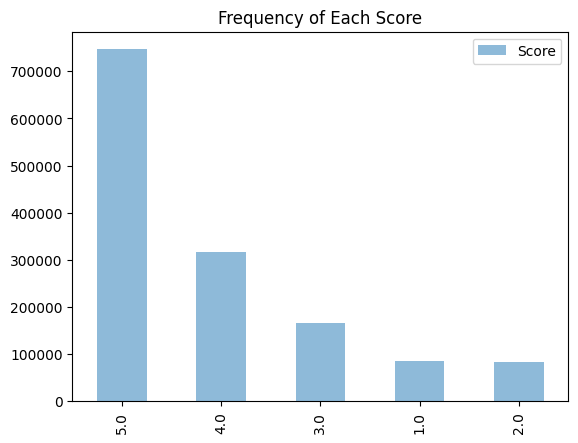

In [4]:
# (1) Score value counts 
trainingSet['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title("Frequency of Each Score")
plt.show()

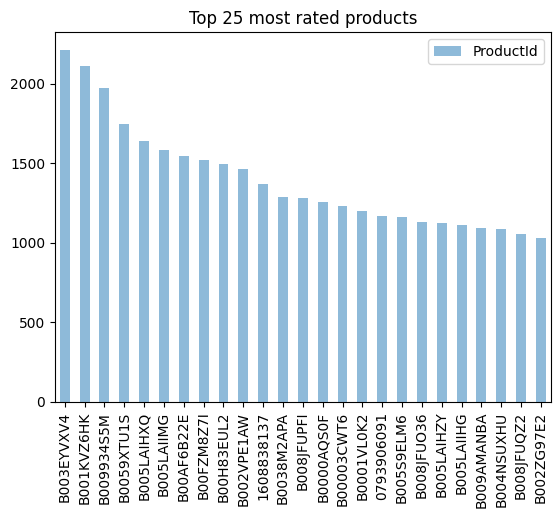

In [6]:
# (2) Top 25 most rated products
trainingSet['ProductId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 most rated products")
plt.show()

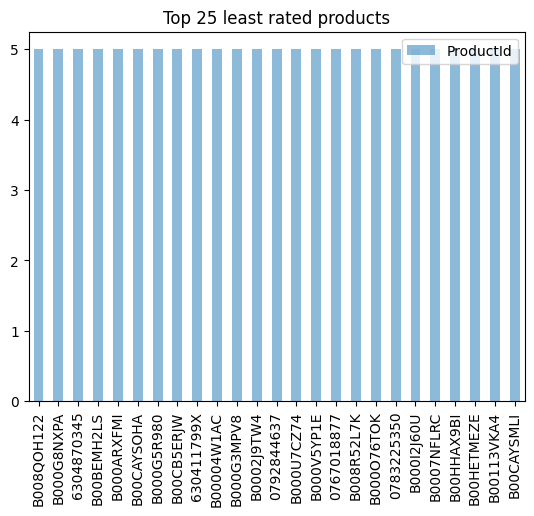

In [7]:
# (3) Top 25 least rated products
trainingSet['ProductId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least rated products")
plt.show()

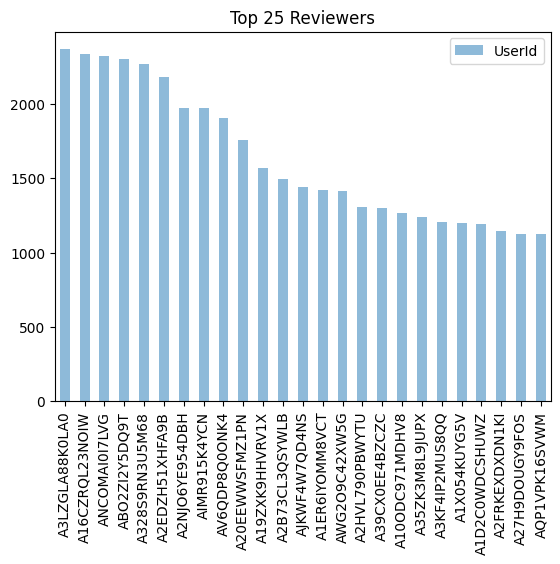

In [8]:
# (4) Top 25 Reviewers
trainingSet['UserId'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 Reviewers")
plt.show()

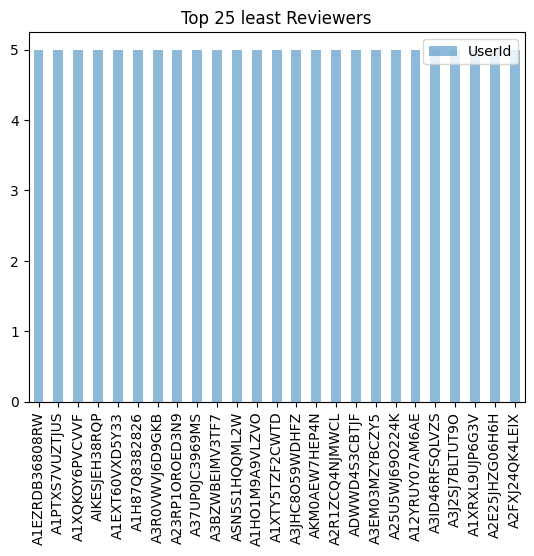

In [9]:
# (5) Top 25 least Reviewers
trainingSet['UserId'].value_counts().nsmallest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title("Top 25 least Reviewers")
plt.show()

In [19]:
import nltk
Xtrain = Xtrain.head(500)
example = Xtrain['Text'][50]
tokens = nltk.word_tokenize(example)
nltk.pos_tag(tokens)
#print(example)



LookupError: 
**********************************************************************
  Resource [93maveraged_perceptron_tagger[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('averaged_perceptron_tagger')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtaggers/averaged_perceptron_tagger/averaged_perceptron_tagger.pickle[0m

  Searched in:
    - '/Users/ShwethaKrishnan/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/share/nltk_data'
    - '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.8/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [48]:
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
score = sia.polarity_scores(example)
print(score)
print(list(score.values())[3])

{'neg': 0.0, 'neu': 0.778, 'pos': 0.222, 'compound': 0.7184}
0.7184


In [26]:
res = {}
for i, row in Xtrain.iterrows():
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [27]:
pd.DataFrame(res).T

,neg,neu,pos,compound
0,0.000,0.731,0.269,0.9584
1,0.000,0.759,0.241,0.6542
2,0.044,0.765,0.191,0.8508
3,0.000,0.933,0.067,0.2724
4,0.000,0.829,0.171,0.6059
...,...,...,...,...
583,0.091,0.832,0.077,-0.6483
584,0.069,0.829,0.102,0.9220
585,0.092,0.783,0.125,0.9867
586,0.000,0.760,0.240,0.7172


In [28]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index':"Id"})
vaders = vaders.merge(Xtrain, how='left')

In [49]:
pd.merge(Xtrain, vaders, left_on='Id', right_on='Id')
Xtrain = vaders
Xtrain.head(10)

,Id,neg,neu,pos,compound,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Helpfulness,ReviewLength,SummaryLength
0,0,0.000,0.731,0.269,0.9584,0005019281,ADZPIG9QOCDG5,0,0,4.0,1203984000,good version of a classic,This is a charming version of the classic Dick...,0.0,54.0,5.0
1,1,0.000,0.759,0.241,0.6542,0005019281,A35947ZP82G7JH,0,0,3.0,1388361600,Good but not as moving,It was good but not as emotionally moving as t...,0.0,23.0,5.0
2,2,0.044,0.765,0.191,0.8508,0005019281,A3UORV8A9D5L2E,0,0,3.0,1388361600,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha...",0.0,47.0,6.0
3,3,0.000,0.933,0.067,0.2724,0005019281,A1VKW06X1O2X7V,0,0,5.0,1202860800,It's an enjoyable twist on the classic story,Henry Winkler is very good in this twist on th...,0.0,30.0,8.0
4,4,0.000,0.829,0.171,0.6059,0005019281,A3R27T4HADWFFJ,0,0,4.0,1387670400,Best Scrooge yet,This is one of the best Scrooge movies out. H...,0.0,26.0,3.0
5,6,0.000,0.829,0.171,0.9726,0005019281,A5NYUBEKXFLX5,1,1,5.0,1230595200,A MUST-HAVE FOR ANY VIDEO CHRISTMAS COLLECTION!!,This is the American adaptation of the Charles...,1.0,125.0,7.0
6,7,0.000,0.803,0.197,0.8225,0005019281,A2DJ8B8GE4V2VD,0,0,5.0,1260835200,An American Christmas Carol,Glad that this american classic came out on dv...,0.0,38.0,4.0
7,8,0.119,0.613,0.268,0.5574,0005019281,AWF2S3UNW9UA0,0,0,5.0,1386201600,an american christmas carol,A good Christmas carol dhenry winkler one duri...,0.0,23.0,4.0
8,9,0.175,0.584,0.241,0.4404,0005019281,A3O4UUT83DG3OU,0,0,5.0,1379721600,Fantastic!,How a bitter old man comes to know the true me...,0.0,21.0,1.0
9,10,0.059,0.778,0.163,0.8612,0005019281,A3TK5Q142X5Q8A,0,0,5.0,1387497600,"Outstanding Concept, and Performances","The small historic Canadian town of Elora, wit...",0.0,70.0,4.0
